In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
print("Hello World")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Hello World


In [2]:
df_yugi = pd.read_csv('dbs/yugi_comp.csv',engine="python",error_bad_lines=False)
df_yugi = df_yugi.drop(['name'], axis=1)
df_yugi = df_yugi[df_yugi['text'].notna()]
df_yugi.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_35692\1007175427.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_yugi = pd.read_csv('dbs/yugi_comp.csv',engine="python",error_bad_lines=False)


,Unnamed: 0,Name,Rarity,Price,isGood,text,card_type,type,family,atk,def,level,property
0,0,XX-Saber Boggart Knight,Shatterfoil Rare,2.73,True,When this card is Normal Summoned: You can Spe...,monster,Beast-Warrior / Effect,earth,1900.0,1000.0,4.0,NaN
1,1,Gagaga Cowboy,Shatterfoil Rare,4.68,True,2 Level 4 monsters\n\nOnce per turn: You can d...,monster,Warrior / Xyz / Effect,earth,1500.0,2400.0,4.0,NaN
2,2,Forbidden Chalice,Shatterfoil Rare,2.09,True,Target 1 face-up monster on the field; until t...,spell,NaN,NaN,NaN,NaN,NaN,Quick-Play
3,3,Fairy Cheer Girl,Shatterfoil Rare,2.06,True,2 Level 4 Fairy-Type monsters\n\nYou can detac...,monster,Fairy / Xyz / Effect,light,1900.0,1500.0,4.0,NaN
4,4,Exploder Dragon,Shatterfoil Rare,2.08,True,If this card is destroyed by battle and sent t...,monster,Dragon / Effect,earth,1000.0,0.0,3.0,NaN


In [3]:
df_yugi.loc[(df_yugi['Name'] == "Baby Dragon")]

,Unnamed: 0,Name,Rarity,Price,isGood,text,card_type,type,family,atk,def,level,property
3267,3267,Baby Dragon,Common,1.79,False,"Much more than just a child, this dragon is gi...",monster,Dragon / Normal,wind,1200.0,700.0,3.0,NaN


In [4]:
import math
def getMonsterType(row):
    if row['card_type'] == 'monster':
        monstype = row['type'].split("/")
        return monstype[-1].replace(" ","")
    else:
        return math.nan


In [5]:
df_yugi['monster_type'] = df_yugi.apply(lambda row: getMonsterType(row), axis=1)
df_yugi.head()

,Unnamed: 0,Name,Rarity,Price,isGood,text,card_type,type,family,atk,def,level,property,monster_type
0,0,XX-Saber Boggart Knight,Shatterfoil Rare,2.73,True,When this card is Normal Summoned: You can Spe...,monster,Beast-Warrior / Effect,earth,1900.0,1000.0,4.0,NaN,Effect
1,1,Gagaga Cowboy,Shatterfoil Rare,4.68,True,2 Level 4 monsters\n\nOnce per turn: You can d...,monster,Warrior / Xyz / Effect,earth,1500.0,2400.0,4.0,NaN,Effect
2,2,Forbidden Chalice,Shatterfoil Rare,2.09,True,Target 1 face-up monster on the field; until t...,spell,NaN,NaN,NaN,NaN,NaN,Quick-Play,NaN
3,3,Fairy Cheer Girl,Shatterfoil Rare,2.06,True,2 Level 4 Fairy-Type monsters\n\nYou can detac...,monster,Fairy / Xyz / Effect,light,1900.0,1500.0,4.0,NaN,Effect
4,4,Exploder Dragon,Shatterfoil Rare,2.08,True,If this card is destroyed by battle and sent t...,monster,Dragon / Effect,earth,1000.0,0.0,3.0,NaN,Effect


In [6]:
df_yu = df_yugi.loc[(df_yugi['monster_type'] != 'Normal')]
df_yu.head

<bound method NDFrame.head of        Unnamed: 0                           Name            Rarity  Price  \
0               0        XX-Saber Boggart Knight  Shatterfoil Rare   2.73   
1               1                  Gagaga Cowboy  Shatterfoil Rare   4.68   
2               2              Forbidden Chalice  Shatterfoil Rare   2.09   
3               3               Fairy Cheer Girl  Shatterfoil Rare   2.06   
4               4                Exploder Dragon  Shatterfoil Rare   2.08   
...           ...                            ...               ...    ...   
11642       11642        Herald of Mirage Lights        Ultra Rare   1.55   
11643       11643   Graveyard of Wandering Souls        Ultra Rare   1.39   
11644       11644  Lib the World Key Blademaster        Ultra Rare   3.47   
11645       11645                   Kingyo Sukui        Ultra Rare   1.22   
11646       11646               Skydive Scorcher        Ultra Rare   1.58   

       isGood                                

In [7]:
df_yu.loc[(df_yu['Name'] == "Baby Dragon")]

,Unnamed: 0,Name,Rarity,Price,isGood,text,card_type,type,family,atk,def,level,property,monster_type


## Baseline

In [8]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
import joblib
import urllib
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
methods = ["Baseline","DeepLearn","SoftMax","Embedding","PreTrain","PostTreat"]
delays = {}
ram = {}
accuracies = {}
fps = {}
tps = {}
fns = {}
tns = {}

In [10]:
def startmeasuring():
    # Start measuring time
    start_time = time.time()

    # Start measuring RAM usage
    start_ram = psutil.Process().memory_info().rss
    return start_time,start_ram

def finishmeasuring(start_time,start_ram):
    # Stop measuring time
    end_time = time.time()

    # Stop measuring RAM usage
    end_ram = psutil.Process().memory_info().rss

    # Calculate elapsed time
    elapsed_time = end_time - start_time

    # Calculate RAM usage
    ram_usage = end_ram - start_ram

    return elapsed_time, ram_usage


In [11]:

import matplotlib.pyplot as plt

confusion = 'true negative', 'false positive', 'false negative', 'true positive'


from sklearn.metrics import confusion_matrix
def build_confusion_matrix(y_test_,y_pred,method):
  y_t = y_test_
  y_p = y_pred
  print(y_t.shape)
  print(y_p.shape)
  tn, fp, fn, tp = confusion_matrix(y_t, y_p).ravel()
  print(f"{confusion[0]}: {tn}")
  print(f"{confusion[1]}: {fp}")
  print(f"{confusion[2]}: {fn}")
  print(f"{confusion[3]}: {tp}")
  sizes = [tn, fp, fn, tp]
  fig, ax = plt.subplots()
  ax.pie(sizes, labels=confusion, autopct='%1.1f%%')

  tns[method] = tn
  fps[method]= fp
  fns[method] =fn
  tps[method] =tp

In [12]:
model_data = df_yu.copy()
method = methods[0]

In [13]:
train_data, test_data = train_test_split(model_data, test_size=0.25, random_state=42)
train_data

,Unnamed: 0,Name,Rarity,Price,isGood,text,card_type,type,family,atk,def,level,property,monster_type
5185,5185,Battlin' Boxer Counterpunch,Common,1.30,False,During the Damage Step of either player's turn...,monster,Warrior / Effect,fire,0.0,1100.0,3.0,NaN,Effect
812,812,Myutant Clash,Common,2.14,True,When you activate this card: You can target 1 ...,trap,NaN,NaN,NaN,NaN,NaN,Continuous,NaN
238,238,Gemini Spark,Common,4.63,True,"Tribute 1 face-up Level 4 Gemini monster, then...",spell,NaN,NaN,NaN,NaN,NaN,Quick-Play,NaN
10452,10452,Conductor of Nephthys,Super Rare,1.94,False,"You can Ritual Summon this card with ""Rebirth ...",monster,Spellcaster / Ritual / Effect,wind,2000.0,0.0,2.0,NaN,Effect
8405,8405,"Voloferniges, the Darkest Dragon Doomrider",Rare,1.16,False,2 Level 7 monsters\n\nOnce per turn: You can d...,monster,Dragon / Xyz / Effect,dark,2500.0,2100.0,7.0,NaN,Effect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11562,11562,Borreload Riot Dragon,Ultra Rare,1.60,False,"You can Ritual Summon this card with ""Heavy In...",monster,Dragon / Ritual / Effect,dark,3000.0,2500.0,8.0,NaN,Effect
5375,5375,Offering to the Snake Deity,Common,1.38,False,Target 1 face-up Reptile monster you control a...,trap,NaN,NaN,NaN,NaN,NaN,Normal,NaN
5574,5574,Gunkan Suship Shari Red,Common,1.14,False,"This card's name becomes ""Gunkan Suship Shari""...",monster,Aqua / Effect,fire,0.0,2000.0,4.0,NaN,Effect
884,884,Black Salvo,Common,2.41,True,When this card is Normal Summoned: You can tar...,monster,Machine / Tuner / Effect,dark,100.0,1100.0,3.0,NaN,Effect


In [14]:
X_train = train_data["text"]
y_train = train_data["isGood"]
X_test = test_data["text"]
y_test = test_data["isGood"]

In [15]:
classificador = Pipeline([
                        ('meu_vetorizador', CountVectorizer(stop_words='english')),
                        ('meu_classificador', LogisticRegression(penalty=None, solver='saga', max_iter=10000))
                        ])
classificador.fit(X_train,y_train)
stime,sram = startmeasuring()
y_pred = classificador.predict(X_test)
etime,eram = finishmeasuring(stime,sram)
acc = accuracy_score(y_pred,y_test)
#methods.append("Baseline")
accuracies[method] = acc
delays[method] = etime
ram[method] = eram
print(acc)

0.7607318789584799


(1, 5636)


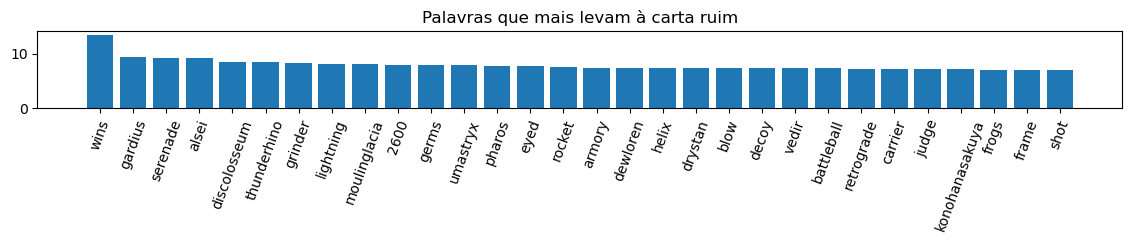

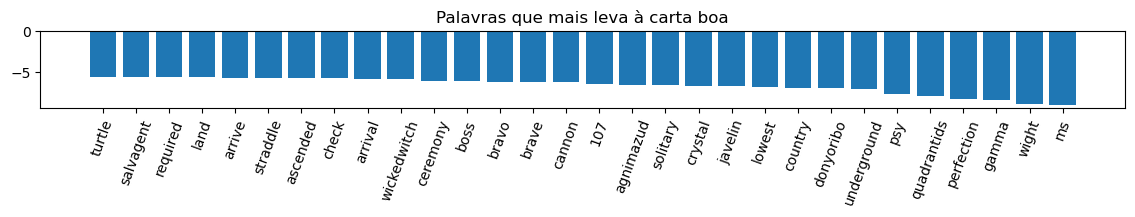

In [16]:
vocabulario = classificador['meu_vetorizador'].vocabulary_
pesos = classificador['meu_classificador'].coef_
print(pesos.shape)

classe_alvo = 0
classe_alvo_str = classificador.classes_[classe_alvo]

palavras_e_pesos = []
for palavra in vocabulario.keys():
    j = vocabulario[palavra]
    coeficiente = pesos[classe_alvo,j]
    palavras_e_pesos.append( (coeficiente, palavra) )

tuplas_ordenadas = sorted(palavras_e_pesos, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 30
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,1))
plt.title('Palavras que mais levam à carta ruim')
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
plt.show()

eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,1))
plt.title('Palavras que mais leva à carta boa')
plt.bar(eixo_x[-n_palavras:], contagens[-n_palavras:])
plt.xticks(eixo_x[-n_palavras:], palavras[-n_palavras:], rotation=70)
plt.show()

(2842,)
(2842,)
true negative: 2064
false positive: 233
false negative: 447
true positive: 98


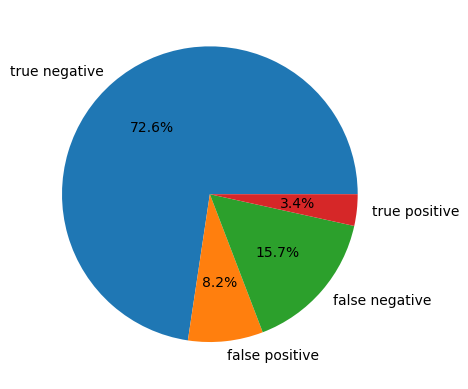

In [17]:
build_confusion_matrix(y_test,y_pred,method)

## Deep Learning in-house

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from keras.layers import Input, Dense, Activation
from keras.models import Model
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [19]:
model_data = df_yu.copy()
method = methods[1]
train_data, test_data = train_test_split(model_data, test_size=0.25, random_state=42)
X_train = train_data["text"]
y_train = train_data["isGood"]
X_test = test_data["text"]
y_test = test_data["isGood"]

In [20]:
def pre_processar_saidas(y):
    y_out = np.zeros_like(y)
    y_out[ y==False ] = -1.0
    y_out[ y==True ] = 1.0
    y_out = y_out.reshape( (-1, 1))
    return y_out.astype(float)

y_train_ = pre_processar_saidas(y_train)
y_test_ = pre_processar_saidas(y_test)

vectorizer = CountVectorizer(stop_words='english', binary=True, max_features=500)
X_train_ = vectorizer.fit_transform(X_train).todense().astype(float)
X_test_ = vectorizer.transform(X_test).todense().astype(float)

In [21]:
def base_model(vocab_size=500):
    input_layer = Input(shape=(vocab_size,))
    x = input_layer
    x = Dense(1, name='classificador')(x)
    x = Activation('tanh')(x)
    return Model(input_layer, x)

clf = base_model()
clf.compile(loss='mean_squared_error', metrics=['accuracy'])
clf.fit(X_train_, y_train_, epochs=5, verbose=1)

Epoch 1/5
267/267 [==============================] - 1s 2ms/step - loss: 0.1109 - accuracy: 0.8478
Epoch 2/5
267/267 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9802
Epoch 3/5
267/267 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9933
Epoch 4/5
267/267 [==============================] - 1s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 5/5
267/267 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 1.0000


In [22]:
evaluation = clf.evaluate(X_test_, y_test_)
print(evaluation)
acc = evaluation[1]

89/89 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 1.0000
[0.0010465540690347552, 1.0]


In [23]:
stime,sram = startmeasuring()
y_pred = clf.predict(X_test_)
#print(y_pred.T)
etime,eram = finishmeasuring(stime,sram)
#methods.append("DeepLearn")
accuracies[method]=(acc)
delays[method]=(etime)
ram[method]=(eram)

89/89 [==============================] - 0s 2ms/step


In [24]:
print(clf.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 classificador (Dense)       (None, 1)                 501       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________
None


In [25]:

print(clf.get_layer('classificador').weights[0].shape)
print(clf.get_layer('classificador').weights[1].shape)

(500, 1)
(1,)


In [26]:
clf = base_model()
clf.compile(loss='mean_squared_error', metrics=['accuracy'])
history = clf.fit(X_train_, y_train_, epochs=5, verbose=1, validation_split=0.1)

Epoch 1/5
240/240 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.8372 - val_loss: 0.0222 - val_accuracy: 0.9683
Epoch 2/5
240/240 [==============================] - 1s 3ms/step - loss: 0.0148 - accuracy: 0.9756 - val_loss: 0.0092 - val_accuracy: 0.9836
Epoch 3/5
240/240 [==============================] - 1s 3ms/step - loss: 0.0068 - accuracy: 0.9906 - val_loss: 0.0046 - val_accuracy: 0.9988
Epoch 4/5
240/240 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/5
240/240 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000


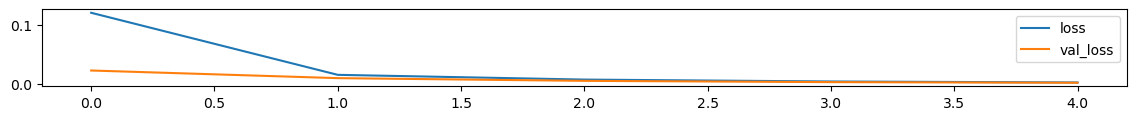

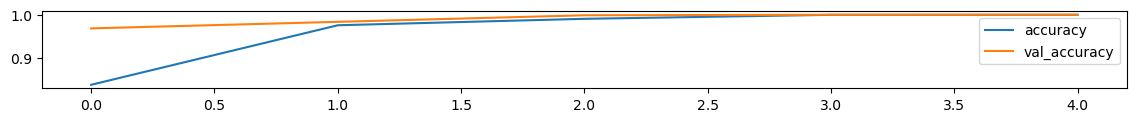

In [27]:
plt.figure(figsize=(14,1))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.figure(figsize=(14,1))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

(2842,)
(2842,)
true negative: 2297
false positive: 0
false negative: 545
true positive: 0


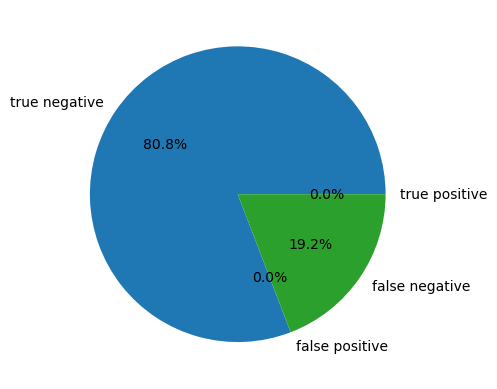

In [28]:
y_t = np.asarray(y_test)
y_p = np.argmax(y_pred,axis=1)

build_confusion_matrix(y_t,y_p,method)

#np.argmax(np.asarray(y_test),axis=1).flatten()
#y_p = np.argmax(clf.predict(X_test), axis=1)

#Softmax

In [29]:
from sklearn.preprocessing import OneHotEncoder

method = methods[2]

ohe = OneHotEncoder()
y_train_ = ohe.fit_transform(y_train.to_numpy().reshape((-1,1))).todense()
y_test_ = ohe.transform(y_test.to_numpy().reshape((-1,1))).todense()

In [30]:
def softmax_model(vocab_size=500):
    input_layer = Input(shape=(vocab_size,))
    x = input_layer
    x = Dense(2, name='classificador')(x)
    x = Activation('softmax')(x)
    return Model(input_layer, x)

clf = softmax_model()
print(clf.summary())
clf.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = clf.fit(X_train_, y_train_, epochs=5, verbose=1) # validation_split=0.1
evaluation = clf.evaluate(X_test_, y_test_)
print(evaluation)
acc = evaluation[1]


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500)]             0         
                                                                 
 classificador (Dense)       (None, 2)                 1002      
                                                                 
 activation_2 (Activation)   (None, 2)                 0         
                                                                 
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
267/267 [==============================] - 1s 3ms/step - loss: 0.5042 - accuracy: 0.8107
Epoch 2/5
267/267 [==============================] - 1s 2ms/step - loss: 0.4830 - accuracy: 0.8136
Epoch 3/5
267/267 [==============================] - 1s 2ms/step - loss: 0.4753 - accuracy: 0.8136
Epoch 4/5
267/267 [

In [31]:
stime,sram = startmeasuring()
y_pred_ = clf.predict(X_test_)
#print(y_pred.T)
etime,eram = finishmeasuring(stime,sram)
#methods.append("SoftMax")
accuracies[method] = acc
delays[method] = etime
ram[method] = eram

89/89 [==============================] - 0s 1ms/step


(2842,)
(2842,)
true negative: 2294
false positive: 3
false negative: 545
true positive: 0


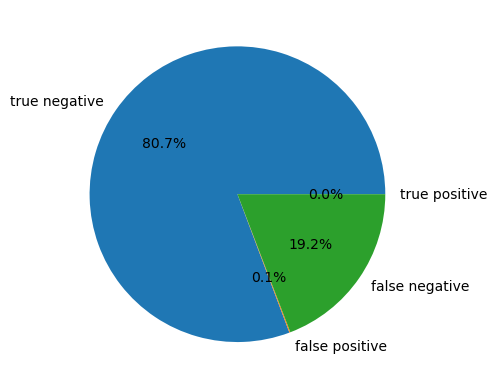

In [32]:
y_t = np.argmax(np.asarray(y_test_),axis=1).flatten()
y_p = np.argmax(y_pred_, axis=1)

build_confusion_matrix(y_t,y_p,method)

#from sklearn.metrics import confusion_matrix
#y_t = np.argmax(np.asarray(y_test_),axis=1).flatten()
#y_p = np.argmax(clf.predict(X_test_), axis=1)
#print(y_t.shape)
#print(y_p.shape)
#tn, fp, fn, tp = confusion_matrix(y_t, y_p).ravel()
#print(f"true negative: {tn}")
#print(f"false positive: {fp}")
#print(f"false negative: {fn}")
#print(f"true negative: {tp}")

In [33]:
from tqdm import tqdm
weights = clf.get_layer('classificador').weights[0].numpy()
CLASSE = 0
for n in tqdm(range(len(vectorizer.vocabulary_))):
    tuplas = [ (weights[vectorizer.vocabulary_[i],CLASSE], i) for i in vectorizer.vocabulary_.keys() ]
    tuplas_ordenadas = sorted(tuplas, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
    palavras = [ t[1] for t in tuplas_ordenadas ]
    contagens = [ t[0] for t in tuplas_ordenadas ]

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1020.16it/s]


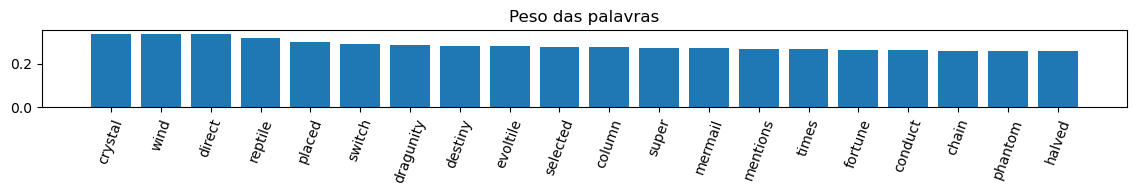

In [34]:
n_palavras = 20

plt.figure(figsize=(14,1))
eixo_x = np.arange(n_palavras)
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=70)
plt.title("Peso das palavras")
plt.show()

# Embeddings

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.layers import Input, Dense, Activation, TextVectorization, Embedding, GlobalAveragePooling1D
from keras.models import Model
import tensorflow as tf

In [36]:
model_data = df_yu.copy()
method = methods[3]
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(model_data['isGood'].to_numpy().reshape((-1,1))).todense()
X_train, X_test, y_train, y_test = train_test_split(model_data['text'], y_ohe)
print(np.shape(X_test))
print(np.shape(y_test))

(2842,)
(2842, 2)


In [37]:
vocab_size = 1000
def multihot_softmax_model(vectorize_layer, vocab_size=vocab_size):
    input_layer = Input(shape=(1,), dtype=tf.string)
    x = input_layer
    x = vectorize_layer(x)
    x = Dense(2, name='classificador')(x)
    x = Activation('softmax')(x)
    return Model(input_layer, x)

vectorize_layer = TextVectorization(output_mode='multi_hot', max_tokens=vocab_size, pad_to_max_tokens=True)
vectorize_layer.adapt(X_train)
clf = multihot_softmax_model(vectorize_layer)
print(clf.summary())
clf.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = clf.fit(X_train, y_train, epochs=30, verbose=1) # validation_split=0.1

print(np.shape(X_test))
print(np.shape(y_test))
evaluation = clf.evaluate(X_test, y_test)
acc = evaluation[1]
print(evaluation)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 1000)             0         
 torization)                                                     
                                                                 
 classificador (Dense)       (None, 2)                 2002      
                                                                 
 activation_3 (Activation)   (None, 2)                 0         
                                                                 
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
267/267 [==============================] - 2s 4ms/step - loss: 0.5136 - accuracy: 0.8034
Epoch 2/30
267/267

In [38]:
arr =np.argmax(clf.predict(X_test),axis=1)

# Get unique values and their counts
unique_values, counts = np.unique(arr, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")
    

89/89 [==============================] - 0s 2ms/step
0 occurs 2671 times
1 occurs 171 times


In [39]:
stime,sram = startmeasuring()
y_pred_ = clf.predict(X_test)
#print(y_pred.T)
etime,eram = finishmeasuring(stime,sram)
#methods.append("Embeddings")
accuracies[method]=(acc)
delays[method]=(etime)
ram[method]=(eram)

89/89 [==============================] - 0s 2ms/step


(2842,)
(2842,)
true negative: 2215
false positive: 129
false negative: 456
true positive: 42


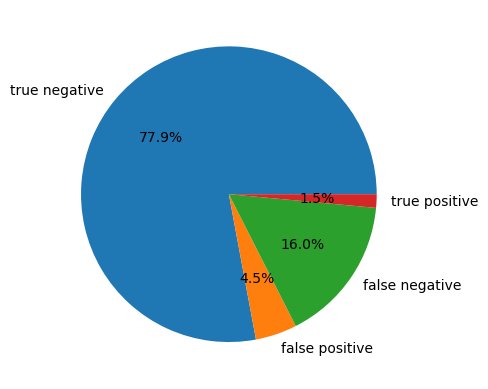

In [40]:
y_t = np.argmax(np.asarray(y_test),axis=1).flatten()
y_p = np.argmax(y_pred_, axis=1)

build_confusion_matrix(y_t,y_p,method)
#from sklearn.metrics import confusion_matrix
#y_t = np.argmax(np.asarray(y_test),axis=1).flatten()
#y_p = np.argmax(clf.predict(X_test), axis=1)
#print(y_t.shape)
#print(y_p.shape)
#tn, fp, fn, tp = confusion_matrix(y_t, y_p).ravel()
#print(f"true negative: {tn}")
#print(f"false positive: {fp}")
#print(f"false negative: {fn}")
#print(f"true negative: {tp}")

In [41]:

import plotly.express as px

## Visualização: onde foi parar cada palavra?
#projecoes = clf.get_layer('classificador').get_weights()[0]
#vocabulario = vectorize_layer.get_vocabulary()
#y_pred_ohe = clf.predict(vocabulario)
#y_pred = ohe.inverse_transform(y_pred_ohe)

#df = pd.DataFrame()
#df['dim_1'] = projecoes[:,0]
#df['dim_2'] = projecoes[:,1]
#df['word'] = vocabulario
#df['prediction'] = y_pred

#px.scatter(df, x="dim_1", y="dim_2", color="prediction", hover_data=["word"], title="Onde foi cada palavra?", width=600, height=600)


In [42]:

#import plotly.express as px
##df = pd.read_csv('embeddings_over_epochs.csv') # Gravei esse arquivo antecipadamente - demora muito para refazê-lo!
#df.head()
#df['prediction'][0] = 'positive' # Isso é definitivamente um hack. Sem isso, o plotly não vê o label 'positive' na primeira época, e começa a remover o label 'positive' dos plots subsequentes.

#px.scatter(df, x="dim_1", y="dim_2", animation_group="word",
#            color="prediction", hover_name="word", title="Training a 2D word embedding for sentiment analysis <br><sup>Where did each word go in the embedding space?</sup>",
#          range_x=[-15,15], range_y=[-15,15],
#          width=800, height=800
#          )


## Rede Pré-Treinada

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from transformers import TFAutoModel

In [44]:
model_data = df_yu.copy()
method = methods[4]

In [45]:
!pip install transformers

In [46]:
from tensorflow import keras
from transformers import TFAutoModel


def load_pretrained_model(vocab_size):
    # Load the pre-trained model
    pretrained_model = TFAutoModel.from_pretrained('distilbert')


    # Remove the softmax layer from the pre-trained model
    pretrained_model.layers.pop() 

    # Freeze the weights of the pre-trained layers
    for layer in pretrained_model.layers:
        layer.trainable = False

    # Create the new model architecture
    input_layer = Input(shape=(1,), dtype=tf.string)
    x = input_layer
    x = vectorize_layer(x)
    x = tf.cast(x, tf.int32)  # Cast the vectorized input to int32
    x = pretrained_model(x)[0]  # Use only the pooled output
    x = tf.keras.layers.GlobalAveragePooling1D()(x)  # Pooling layer to reduce dimensions
    x = Dense(2, name='classificador')(x)
    x = Activation('softmax')(x)
    
    model = Model(input_layer, x)
    return model



In [47]:
model_data = df_yu.copy()
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(model_data['isGood'].to_numpy().reshape((-1,1))).todense()
#y_ohe = model_data['isGood']
X_train, X_test, y_train, y_test = train_test_split(model_data['text'] , y_ohe )


print(np.shape(X_test))
print(np.shape(y_test))
#ohe = OneHotEncoder()
#y_t = model_data['isGood']
#y_ohe = ohe.fit_transform(model_data['isGood'].to_numpy().reshape((-1,1))).todense()
#X = model_data['text']

(2842,)
(2842, 2)


In [48]:
vocab_size = 1000

vectorize_layer = TextVectorization(output_mode='multi_hot', max_tokens=vocab_size, pad_to_max_tokens=True)
vectorize_layer.adapt(X_train)



In [49]:
clf = load_pretrained_model(vocab_size)
print(clf.summary())


Some layers from the model checkpoint at google/mobilebert-uncased were not used when initializing TFMobileBertModel: ['predictions___cls', 'seq_relationship___cls']
- This IS expected if you are initializing TFMobileBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFMobileBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFMobileBertModel were initialized from the model checkpoint at google/mobilebert-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMobileBertModel for predictions without further training.


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 1000)             0         
 ectorization)                                                   
                                                                 
 tf.cast (TFOpLambda)        (None, 1000)              0         
                                                                 
 tf_mobile_bert_model (TFMob  TFBaseModelOutputWithPoo  24581888 
 ileBertModel)               ling(last_hidden_state=(            
                             None, 1000, 512),                   
                              pooler_output=(None, 51            
                             2),                                 
                              hidden_states=None, att      

In [50]:
print(np.shape(X_test))
print(np.shape(y_test))


(2842,)
(2842, 2)


In [51]:
clf.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
X_test_vectorized = tf.reshape(vectorize_layer(X_test), (-1, 1)).numpy()

print(np.shape(X_test))
print(np.shape(y_test))
print(np.shape(X_test_vectorized))

# Vectorize the test data
#X_test_vectorized = vectorize_layer(X_test)

# Reshape the input data if necessary
#X_test_vectorized = np.reshape(X_test, (-1, 1))

y_pred_prob = clf.predict(X_test_vectorized)
y_pred = (y_pred_prob[:, 1] > 0.5)

# Evaluate the predictions
acc = sum(y_pred == y_test[:, 1]) / len(y_test)
print("Accuracy:", acc)

(2842,)
(2842, 2)
(2842000, 1)


UnimplementedError: Graph execution error:

Detected at node 'model_4/Cast' defined at (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Dell\AppData\Local\Temp\ipykernel_35692\3867321034.py", line 14, in <module>
      y_pred_prob = clf.predict(X_test_vectorized)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 650, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 762, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'model_4/Cast'
Cast float to string is not supported
	 [[{{node model_4/Cast}}]] [Op:__inference_predict_function_100773]

In [ ]:

clf.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = clf.fit(X_train, y_train, epochs=30, verbose=1) # validation_split=0.1
#X_test_vectorized = vectorize_layer(X_test).numpy()
evaluation = clf.evaluate(y_pred,y_test)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])
acc = evaluation[1]

In [ ]:
stime,sram = startmeasuring()
y_pred_ = clf.predict(X_test)
#print(y_pred.T)
etime,eram = finishmeasuring(stime,sram)
#methods.append("PreTrained")
accuracies[method]=acc
delays[method]=(etime)
ram[method]=(eram)

In [ ]:
y_t = np.argmax(np.asarray(y_test),axis=1).flatten()
y_p = np.argmax(y_pred_, axis=1)
build_confusion_matrix(y_t,y_p,method)
#from sklearn.metrics import confusion_matrix
#y_t = np.argmax(np.asarray(y_test),axis=1).flatten()
#y_p = np.argmax(clf.predict(X_test), axis=1)
#print(y_t.shape)
#print(y_p.shape)
#tn, fp, fn, tp = confusion_matrix(y_t, y_p).ravel()
#print(f"true negative: {tn}")
#print(f"false positive: {fp}")
#print(f"false negative: {fn}")
#print(f"true negative: {tp}")

## Pos Tratamento

In [ ]:
method = methods[5]

In [ ]:
stime,sram = startmeasuring()

y_pred_prob = clf.predict(X_test)
y_pred = (y_pred_prob[:, 1] > 0.001)

etime,eram = finishmeasuring(stime,sram)
#methods.append("PosTreat")
accuracies[method]=(acc)
delays[method]=(etime)
ram[method]=(eram)

print(y_pred)
# Evaluate the predictions
acc = sum(y_pred == y_test[:, 1]) / len(y_test)
print("Accuracy:", acc)

In [ ]:
print(y_pred_prob)

In [ ]:
#from sklearn.metrics import confusion_matrix
y_t = np.argmax(np.asarray(y_test),axis=1).flatten()
y_p = y_pred
build_confusion_matrix(y_t,y_p,method)
#print(y_t.shape)
#print(y_p.shape)
#tn, fp, fn, tp = confusion_matrix(y_t, y_p).ravel()
#print(f"true negative: {tn}")
#print(f"false positive: {fp}")
#print(f"false negative: {fn}")
#print(f"true negative: {tp}")
#tns.append(tn)
#fps.append(fp)
#fns.append(fn)
#tps.append(tp)

In [ ]:
y_pred_prob[:, 1].max()

##Comparison

In [ ]:
#Accuracy
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

names = list(accuracies.keys())
values = list(accuracies.values())

plt.bar(range(len(accuracies)), values, tick_label=names)
plt.show()

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy/method')

plt.show()

In [ ]:
#Accuracy
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

names = list(delays.keys())
values = list(delays.values())

plt.bar(range(len(delays)), values, tick_label=names)
plt.show()

ax.set_ylabel('Time')
ax.set_title('Time/method')

plt.show()

In [ ]:
#Accuracy
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

names = list(ram.keys())
values = list(ram.values())

plt.bar(range(len(ram)), values, tick_label=names)
plt.show()

ax.set_ylabel('RAM')
ax.set_title('RAM/method')

plt.show()


In [ ]:
#Accuracy
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

names = list(tns.keys())
values = list(tns.values())

plt.bar(range(len(tns)), values, tick_label=names)
plt.show()

ax.set_ylabel('true negatives')
ax.set_title('true negatives/method')

plt.show()


In [ ]:
#confusion = 'true negative', 'false positive', 'false negative', 'true positive'
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

names = list(fps.keys())
values = list(fps.values())

plt.bar(range(len(fps)), values, tick_label=names)
plt.show()

ax.set_ylabel('false positives')
ax.set_title('false positives/method')

plt.show()

In [ ]:
#confusion = 'true negative', 'false positive', 'false negative', 'true positive'
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

names = list(tps.keys())
values = list(tps.values())

plt.bar(range(len(tps)), values, tick_label=names)
plt.show()

ax.set_ylabel('true positives')
ax.set_title('true positives/method')

plt.show()

In [ ]:
#confusion = 'true negative', 'false positive', 'false negative', 'true positive'
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

names = list(fns.keys())
values = list(fns.values())

plt.bar(range(len(tps)), values, tick_label=names)
plt.show()

ax.set_ylabel('false negatives')
ax.set_title('false negatives/method')

plt.show()